In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
df_index = pd.read_csv("economic_index.csv")
df_index

,Unnamed: 0,year,month,interest_rate,unemployment_rate,index_price
0,0,2017,12,2.75,5.3,1464
1,1,2017,11,2.50,5.3,1394
2,2,2017,10,2.50,5.3,1357
3,3,2017,9,2.50,5.3,1293
4,4,2017,8,2.50,5.4,1256
5,5,2017,7,2.50,5.6,1254
6,6,2017,6,2.50,5.5,1234
7,7,2017,5,2.25,5.5,1195
8,8,2017,4,2.25,5.5,1159
9,9,2017,3,2.25,5.6,1167


In [3]:
## drop unnecessary year and month 
df_index.drop(columns=["Unnamed: 0","year","month"],axis=1,inplace=True)

In [4]:
df_index.head()

,interest_rate,unemployment_rate,index_price
0,2.75,5.3,1464
1,2.50,5.3,1394
2,2.50,5.3,1357
3,2.50,5.3,1293
4,2.50,5.4,1256


In [5]:
#check null value
df_index.isnull().sum()

interest_rate        0
unemployment_rate    0
index_price          0
dtype: int64

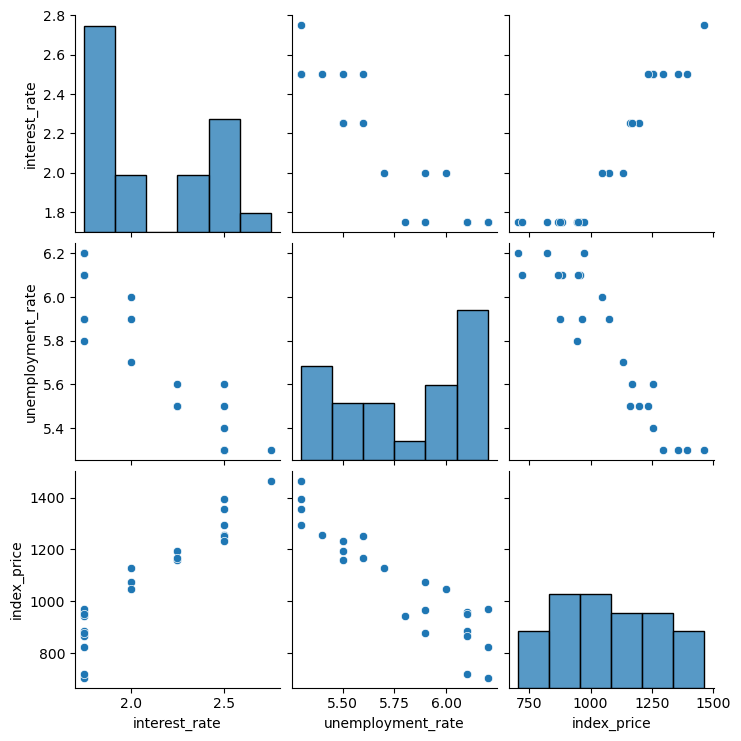

In [6]:
## Visualization
import seaborn as sns
sns.pairplot(df_index)

In [7]:
df_index.corr()

,interest_rate,unemployment_rate,index_price
interest_rate,1.000000,-0.925814,0.935793
unemployment_rate,-0.925814,1.000000,-0.922338
index_price,0.935793,-0.922338,1.000000


Text(0, 0.5, 'unemployment rate')

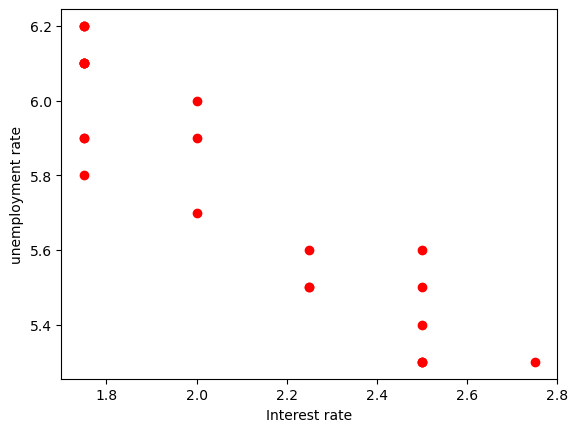

In [8]:
##visualize the data points
plt.scatter(df_index['interest_rate'],df_index['unemployment_rate'],color='r')
plt.xlabel("Interest rate")
plt.ylabel("unemployment rate")

In [9]:
##independent and dependent features

# X=df_index.iloc[:,:-1]
#y=df_index.iloc [:,-1]

X=df_index[['interest_rate','unemployment_rate']]
Y= df_index['index_price']
X.head()

,interest_rate,unemployment_rate
0,2.75,5.3
1,2.50,5.3
2,2.50,5.3
3,2.50,5.3
4,2.50,5.4


In [10]:
Y

0     1464
1     1394
2     1357
3     1293
4     1256
5     1254
6     1234
7     1195
8     1159
9     1167
10    1130
11    1075
12    1047
13     965
14     943
15     958
16     971
17     949
18     884
19     866
20     876
21     822
22     704
23     719
Name: index_price, dtype: int64

In [11]:
# train test split
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.20,random_state=42)

In [12]:
import seaborn as sns


/Users/u1460580/anaconda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='interest_rate', ylabel='index_price'>

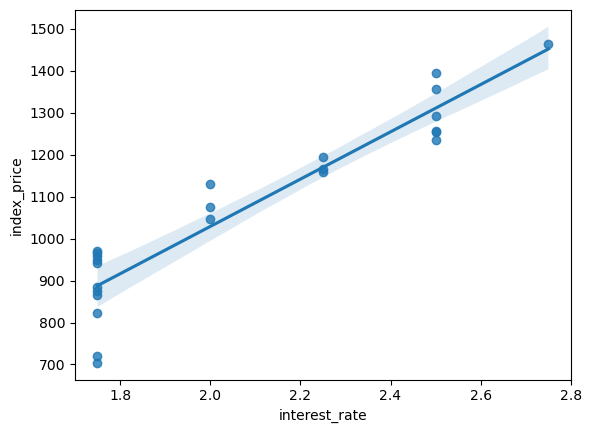

In [13]:
sns.regplot(df_index['interest_rate'],df_index['index_price'])

<AxesSubplot:xlabel='interest_rate', ylabel='unemployment_rate'>

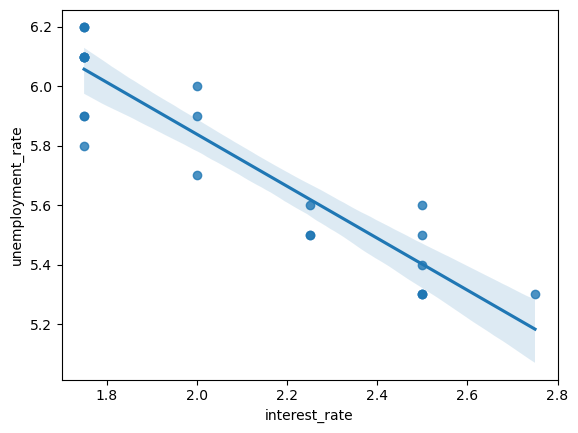

In [14]:
sns.regplot(df_index['interest_rate'],df_index['unemployment_rate'])

<AxesSubplot:xlabel='index_price', ylabel='unemployment_rate'>

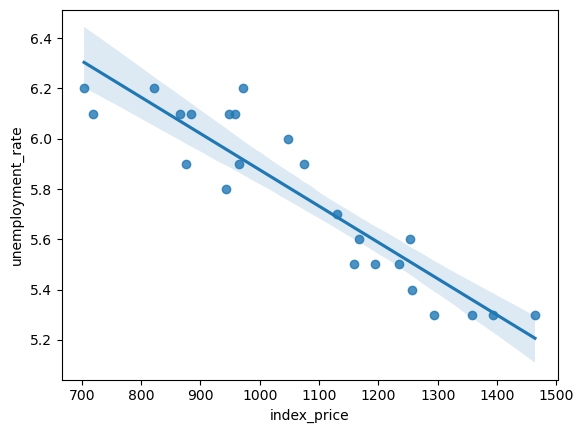

In [15]:
sns.regplot(df_index['index_price'],df_index['unemployment_rate'])

In [16]:
from sklearn.preprocessing import StandardScaler

In [17]:
scaler =StandardScaler()
X_train =scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [18]:
X_train

array([[ 0.55339859, -0.53244666],
       [-0.9486833 ,  0.41597395],
       [ 1.30443953, -1.48086727],
       [-0.9486833 ,  1.36439457],
       [ 1.30443953, -0.53244666],
       [ 1.30443953, -1.48086727],
       [-0.19764235,  0.73211416],
       [-0.9486833 ,  1.04825436],
       [ 1.30443953, -1.48086727],
       [ 1.30443953, -1.16472707],
       [-0.9486833 ,  1.36439457],
       [-0.9486833 ,  1.04825436],
       [-0.9486833 ,  0.41597395],
       [-0.9486833 ,  1.04825436],
       [ 0.55339859, -0.84858687],
       [-0.19764235, -0.21630646],
       [-0.9486833 ,  0.09983375],
       [-0.9486833 ,  1.04825436],
       [ 1.30443953, -0.84858687]])

In [19]:
from sklearn.linear_model import LinearRegression


In [20]:
regression =LinearRegression()
regression.fit(X_train,Y_train)

LinearRegression()

In [21]:
##cross validation
from sklearn.model_selection import cross_val_score

In [22]:
validation_score=cross_val_score(regression,X_train,Y_train,scoring="neg_mean_squared_error",cv =3)

In [23]:
validation_score

array([-4304.75412833, -7608.56499271, -5108.77588052])

In [24]:
np.mean(validation_score)

-5674.031667186765

In [25]:
##prediction

y_pred=regression.predict(X_test)

In [26]:
y_pred

array([1204.14403741,  821.62603274, 1406.38534684,  857.68137178,
        994.85736555])

In [27]:
## performanace metrics
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [28]:
mse=mean_squared_error(Y_test,y_pred)
mae=mean_absolute_error(Y_test,y_pred)
rmse=np.sqrt(mse)
print(mse)
print(mae)
print(rmse)

6957.105303258827
71.71878409976621
83.4092638935198


In [29]:
## R Square


from sklearn.metrics import r2_score


In [30]:
score=r2_score(Y_test,y_pred)
print(score)

0.8254940547158577


In [31]:
#display adjusted R-squared
1 - (1-score)*(len(Y_test)-1)/(len(Y_test)-X_test.shape[1]-1)

0.6509881094317154

In [42]:
print(regression.coef_)

[  86.63351334 -114.04857249]


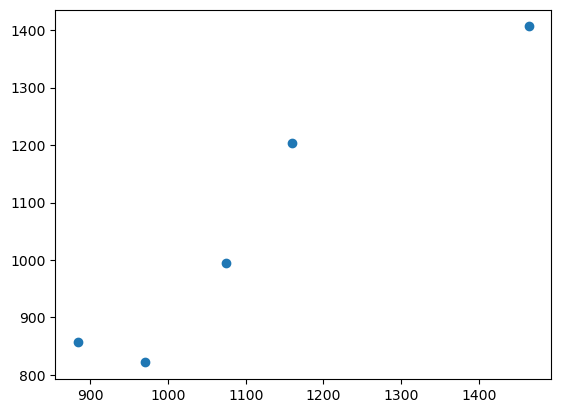

In [33]:
#Assumptions
plt.scatter(Y_test,y_pred)


In [35]:
residuals= Y_test-y_pred
print(residuals)

8     -45.144037
16    149.373967
0      57.614653
18     26.318628
11     80.142634
Name: index_price, dtype: float64


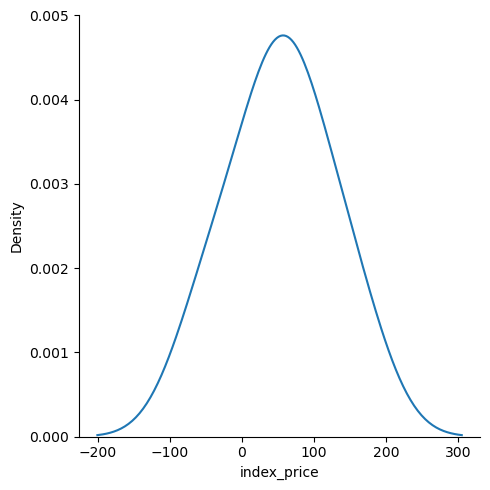

In [36]:
sns.displot(residuals,kind='kde')

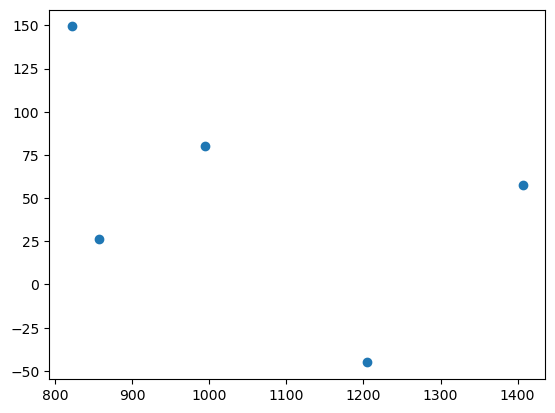

In [37]:
## scatter plot with respect to prediction and residuals

plt.scatter(y_pred,residuals)

In [38]:
##OLS 
import statsmodels.api as sm

In [39]:
model =sm.OLS(Y_train,X_train).fit()

In [40]:
prediction = model.predict(X_test)
print(prediction)

[ 144.72298478 -237.7950199   346.96429421 -201.73968085  -64.56368708]


In [41]:
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:            index_price   R-squared (uncentered):                   0.033
Model:                            OLS   Adj. R-squared (uncentered):             -0.081
Method:                 Least Squares   F-statistic:                             0.2916
Date:                Fri, 14 Jun 2024   Prob (F-statistic):                       0.751
Time:                        11:37:47   Log-Likelihood:                         -159.34
No. Observations:                  19   AIC:                                      322.7
Df Residuals:                      17   BIC:                                      324.6
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

/Users/u1460580/anaconda/lib/python3.9/site-packages/scipy/stats/_stats_py.py:1769: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=19
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "
